In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import json

In [2]:
all_data = []

with open('reviews_texts.txt') as f:
    for json_text in f:
        json_string = json.loads(json_text)
        
        cat3 = json_string['cat3']
        cat4 = json_string['cat4']
        year = json_string['review_date'][6:]
        if year == '':
            continue
        
        i = 0
        rating1 = 0
        rating2 = 0
        rating3 = 0
        rating4 = 0
        rating5 = 0
        
        if json_string['rating_1'] != '':
            rating1 = int(json_string['rating_1'].split(':')[1][:-2])
            i += 1        
        if json_string['rating_2'] != '':
            rating2 = int(json_string['rating_2'].split(':')[1][:-2])
            i += 1
        if json_string['rating_3'] != '':
            rating3 = int(json_string['rating_3'].split(':')[1][:-2])
            i += 1
        if json_string['rating_4'] != '':
            rating4 = int(json_string['rating_4'].split(':')[1][:-2])
            i += 1
        if json_string['rating_5'] != '':
            rating5 = int(json_string['rating_5'].split(':')[1][:-2])
            i += 1
        
        if i == 0:
            continue
            
        review_rating = int((rating1 + rating2 + rating3 + rating4 + rating5) / i) / 20
        
        review = json_string['description']
        
        current_json = {'cat3': cat3, 'cat4': cat4, 'year': year, 'review_rating': review_rating, 'review': review}
        
        all_data.append(current_json)

In [3]:
count = 0
words = []

for review in all_data:
    sentences = review['review'].split('.')
    for sentence in sentences:
        for word in (sentence.split(' ')):
            words.append(word.lower())

In [4]:
df = pd.DataFrame(data=all_data)

In [5]:
df.head()

cat3             cat4  \
0          Витамины и микроэлементы     Фармстандарт   
1     Противоаллергические средства  Schering-Plough   
2                    Обезболивающие        Биосинтез   
3          Витамины и микроэлементы     Верваг Фарма   
4  Гастроэнтерологические препараты   Европа-Биофарм   

                                              review  review_rating  year  
0  Сын совсем еще малыш, 3 года, ходим в сад, и в...            2.2  2016  
1  моя дочурка аллергик. Когда я узнала об этом, ...            4.4  2015  
2  Во время беременности у меня первый триместр с...            5.0  2014  
3  Лекарственное средство Магнерот мне выписал мо...            5.0  2015  
4  Если вы планируете использовать для лечения пр...            3.8  2016

In [6]:
# КОЛИЧЕСТВО ОТЗЫВОВ

df.cat3.value_counts().sum()

157889

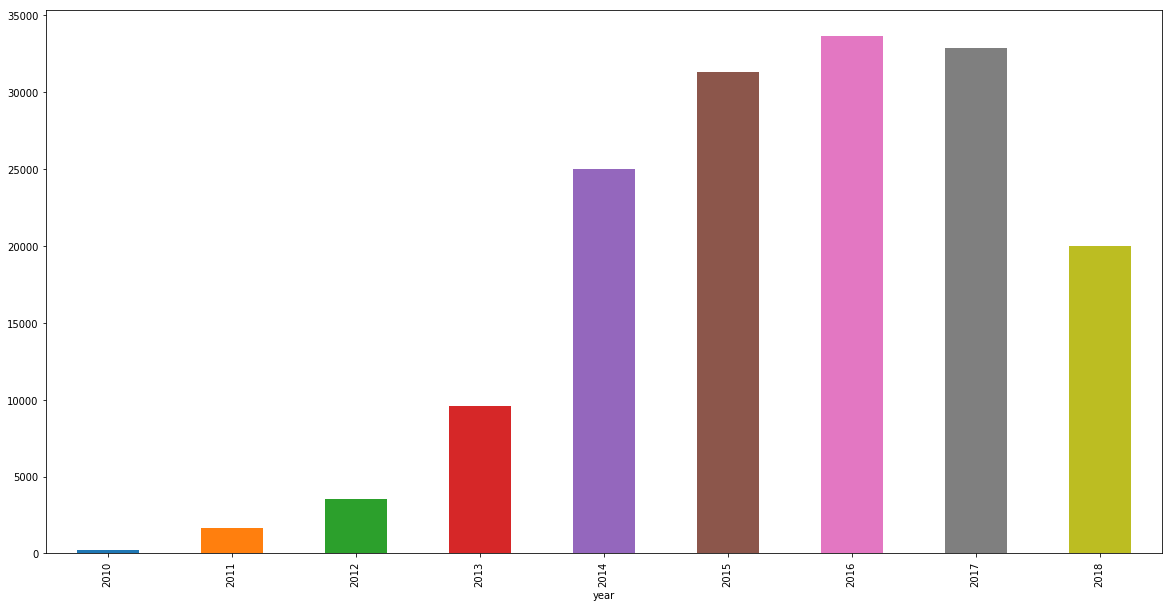

In [7]:
# КОЛИЧЕСТВО ОТЗЫВОВ ПО ГОДАМ

year_reviews = df.groupby('year').cat3.size()
figure(figsize=(20,10))
year_reviews.plot(kind='bar')
plt.savefig('year_reviews.png', bbox_inches='tight')

In [8]:
# ЧИСЛО УНИКАЛЬНЫХ ЛЕТ

len(df.year.unique())

9

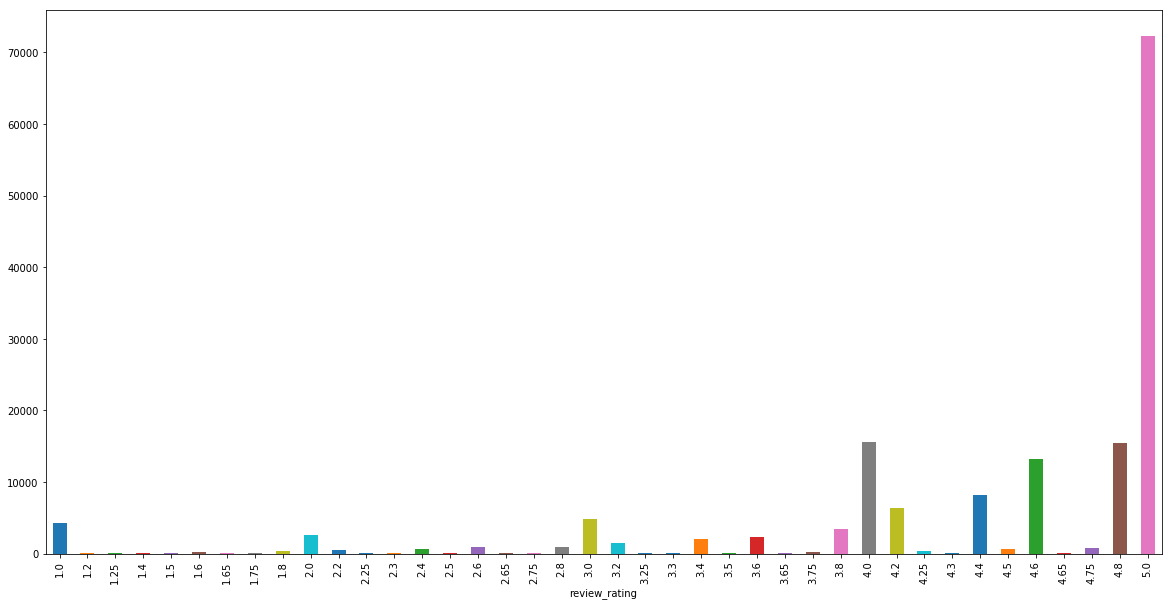

In [9]:
# КОЛИЧЕСТВО ОТЗЫВОВ ПО РЕЙТИНГУ

rating_reviews = df.groupby('review_rating').cat3.size()
plt.figure(figsize=(20,10))
rating_reviews.plot(kind='bar')
plt.savefig('rating_reviews.png', bbox_inches='tight')

In [10]:
# ЧИСЛО УНИКАЛЬНЫХ РЕЙТИНГОВ

len(df.review_rating.unique())

40

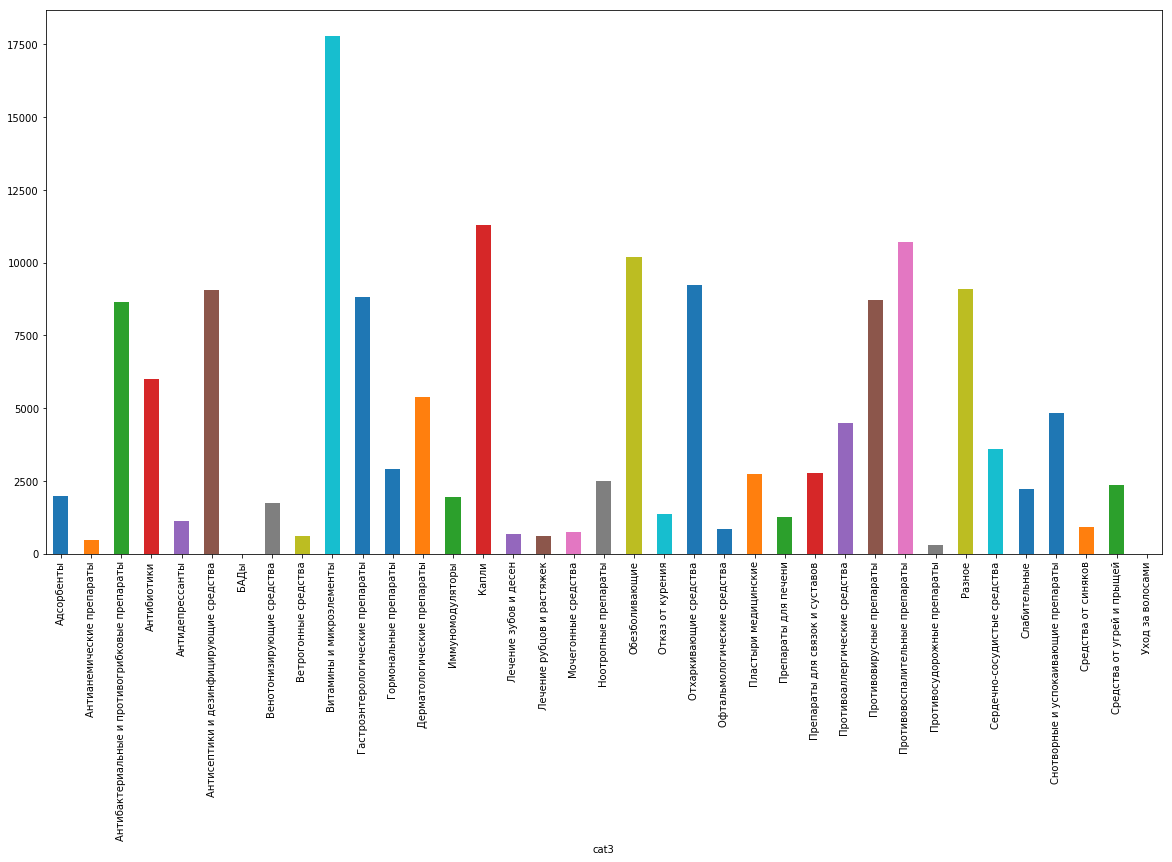

In [14]:
# КОЛИЧЕСТВО ОТЗЫВОВ ПО КАТЕГОРИЯМ

cat3_reviews = df.groupby('cat3').size()
plt.figure(figsize=(20,10))
cat3_reviews.plot(kind='bar')
plt.savefig('cat3_reviews.png', bbox_inches='tight')

In [15]:
# ЧИСЛО УНИКАЛЬНЫХ КАТЕГОРИЙ

len(df.cat3.unique())

37